In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# CELDA: Estadística Descriptiva Rigurosa

print("="*80)
print("📊 ANÁLISIS ESTADÍSTICO DESCRIPTIVO COMPLETO")
print("="*80)

df_clean = pd.read_csv('PCOS_data_winsorized.csv')

# Variables numéricas continuas
numeric_vars = [
    ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
    'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
    'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)',
    'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
    'Waist:Hip Ratio', 'Endometrium (mm)',
    'Follicle No. (L)', 'Follicle No. (R)'
]

numeric_vars = [col for col in numeric_vars if col in df_clean.columns]

# Crear tabla de estadísticas
stats_summary = []

for var in numeric_vars:
    data = df_clean[var].dropna()
    
    stats_summary.append({
        'Variable': var,
        'N': len(data),
        'Media': data.mean(),
        'Mediana': data.median(),
        'Std': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Q1': data.quantile(0.25),
        'Q3': data.quantile(0.75),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Skewness': stats.skew(data),  # Asimetría
        'Kurtosis': stats.kurtosis(data)  # Curtosis
    })

stats_df = pd.DataFrame(stats_summary)

print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
print(stats_df.to_string(index=False))

# Guardar
stats_df.to_csv('estadisticas_descriptivas.csv', index=False)
print("\n💾 Guardado: estadisticas_descriptivas.csv")

📊 ANÁLISIS ESTADÍSTICO DESCRIPTIVO COMPLETO

📈 ESTADÍSTICAS DESCRIPTIVAS:
        Variable   N      Media  Mediana       Std     Min    Max       Q1       Q3     IQR  Skewness   Kurtosis
       Age (yrs) 538  31.444238   31.000  5.419949  20.000  48.00  28.0000  35.0000  7.0000  0.347773  -0.167265
     Weight (Kg) 538  59.640706   59.300 11.037540  31.000 108.00  52.0000  65.0000 13.0000  0.512809   1.156704
     Height(Cm)  538 156.487539  156.000  6.040716 137.000 180.00 152.0000 160.0000  8.0000  0.325126   0.324158
             BMI 538  24.307993   24.200  4.057119  12.400  38.90  21.6250  26.6000  4.9750  0.269450   0.867395
Pulse rate(bpm)  538  73.262082   72.000  4.437870  13.000  82.00  72.0000  74.0000  2.0000 -7.938203 105.836331
RR (breaths/min) 538  19.250929   18.000  1.690771  16.000  28.00  18.0000  20.0000  2.0000  1.222799   2.651709
        Hb(g/dl) 538  11.165390   11.000  0.864963   8.500  14.80  10.5000  11.7750  1.2750  0.750915   0.870128
     FSH(mIU/mL) 538  

📊 ANÁLISIS ESTADÍSTICO COMPLETO

📊 Dataset cargado:
   Filas: 538
   Columnas: 42
   No-SOP: 362
   SOP: 176

📈 PARTE 1: ESTADÍSTICA DESCRIPTIVA

📊 Analizando 22 variables numéricas

📊 ESTADÍSTICAS DESCRIPTIVAS (Top 10):

        Variable   N     Media  Mediana  Desv_Std   Min    Max      Q1      Q3     IQR  Asimetria   Curtosis
     Weight (Kg) 538 59.640706   59.300 11.037540 31.00 108.00 52.0000 65.0000 13.0000   0.512809   1.156704
             BMI 538 24.307993   24.200  4.057119 12.40  38.90 21.6250 26.6000  4.9750   0.269450   0.867395
RR (breaths/min) 538 19.250929   18.000  1.690771 16.00  28.00 18.0000 20.0000  2.0000   1.222799   2.651709
        Hb(g/dl) 538 11.165390   11.000  0.864963  8.50  14.80 10.5000 11.7750  1.2750   0.750915   0.870128
     FSH(mIU/mL) 538  5.273645    4.845  4.497438  0.21  65.40  3.3000  6.4075  3.1075   8.889514 105.924642
      LH(mIU/mL) 538  2.743914    2.245  2.311547  0.02  14.69  1.0200  3.6650  2.6450   1.650043   3.793840
          FSH/L

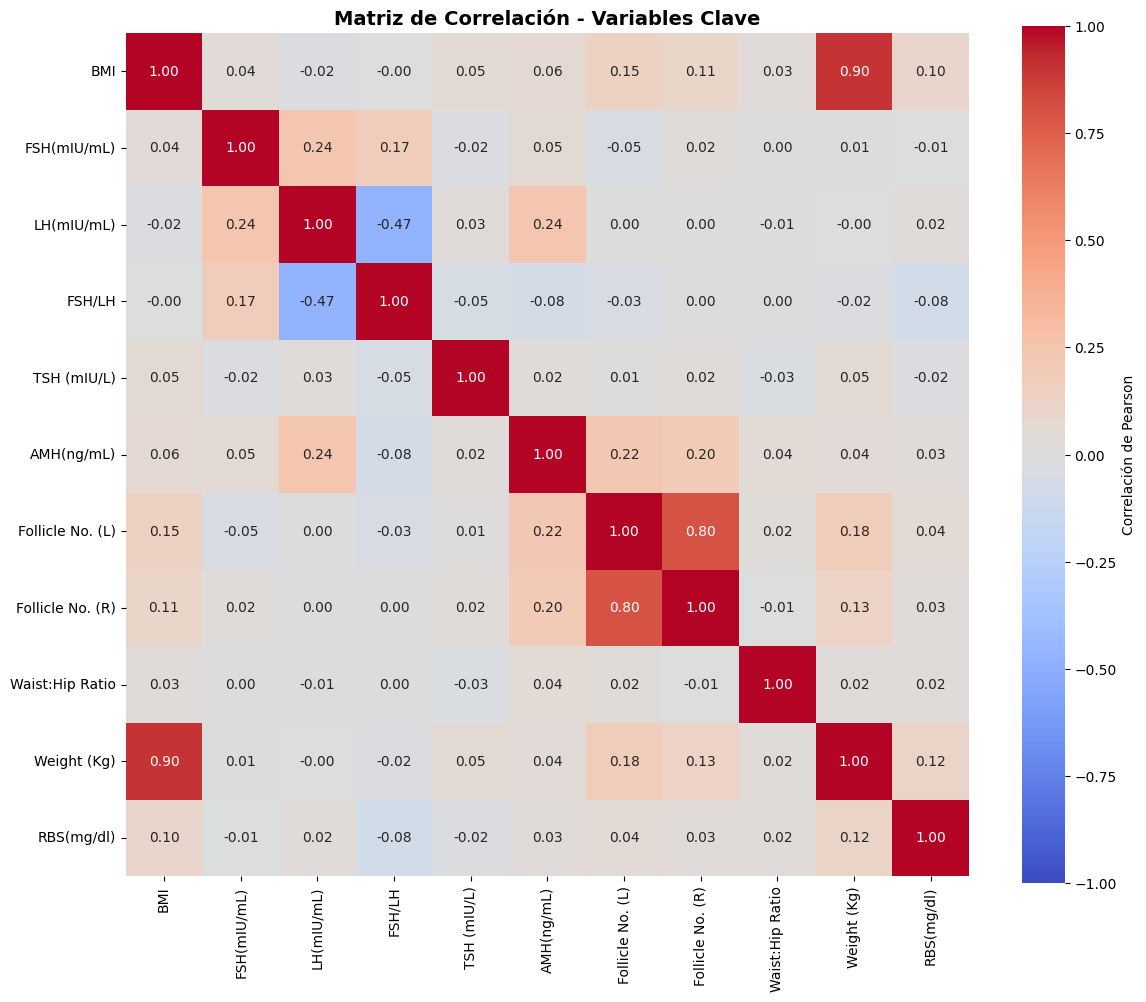

💾 Guardado: matriz_correlacion_heatmap.png

📊 PARTE 5: ANÁLISIS DE MULTICOLINEALIDAD (VIF)

Calculando Variance Inflation Factor (VIF)...
VIF < 5: No hay multicolinealidad
VIF 5-10: Multicolinealidad moderada
VIF > 10: Multicolinealidad severa

Variable                            VIF             Status         
-----------------------------------------------------------------
BMI                                 199.12          SEVERO         
Weight (Kg)                         166.23          SEVERO         
Waist:Hip Ratio                     58.40           SEVERO         
RBS(mg/dl)                          29.09           SEVERO         
Follicle No. (R)                    9.08            Moderado       
Follicle No. (L)                    8.96            Moderado       
LH(mIU/mL)                          3.77            OK             
FSH(mIU/mL)                         2.88            OK             
AMH(ng/mL)                          2.38            OK             
FSH/LH   

In [5]:
"""
NOTEBOOK 03: ANÁLISIS ESTADÍSTICO COMPLETO
==========================================

Objetivo: Análisis estadístico riguroso del dataset limpio
Entrada: PCOS_data_winsorized.csv (538 filas)
Salida: Reportes estadísticos, pruebas de hipótesis, correlaciones
"""

# ================================================================
# CELDA 1: Configuración e imports
# ================================================================

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, normaltest, mannwhitneyu, ttest_ind, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("📊 ANÁLISIS ESTADÍSTICO COMPLETO")
print("="*80)

# Cargar datos limpios
df = pd.read_csv('PCOS_data_winsorized.csv')

print(f"\n📊 Dataset cargado:")
print(f"   Filas: {len(df)}")
print(f"   Columnas: {len(df.columns)}")
print(f"   No-SOP: {(df['PCOS (Y/N)']==0).sum()}")
print(f"   SOP: {(df['PCOS (Y/N)']==1).sum()}")

# ================================================================
# CELDA 2: Estadística Descriptiva Completa
# ================================================================

print("\n" + "="*80)
print("📈 PARTE 1: ESTADÍSTICA DESCRIPTIVA")
print("="*80)

# Variables numéricas continuas
numeric_vars = [
    'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
    'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
    'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)',
    'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
    'Waist:Hip Ratio', 'Endometrium (mm)',
    'Follicle No. (L)', 'Follicle No. (R)',
    'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
    'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
    'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)'
]

# Verificar qué columnas existen
numeric_vars = [col for col in numeric_vars if col in df.columns]

print(f"\n📊 Analizando {len(numeric_vars)} variables numéricas")

# Crear tabla de estadísticas
stats_summary = []

for var in numeric_vars:
    data = df[var].dropna()
    
    stats_summary.append({
        'Variable': var,
        'N': len(data),
        'Media': data.mean(),
        'Mediana': data.median(),
        'Desv_Std': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Q1': data.quantile(0.25),
        'Q3': data.quantile(0.75),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Asimetria': stats.skew(data),
        'Curtosis': stats.kurtosis(data)
    })

stats_df = pd.DataFrame(stats_summary)

print("\n📊 ESTADÍSTICAS DESCRIPTIVAS (Top 10):\n")
print(stats_df.head(10).to_string(index=False))

# Guardar completo
stats_df.to_csv('estadisticas_descriptivas.csv', index=False)
print("\n💾 Guardado completo: estadisticas_descriptivas.csv")

# ================================================================
# CELDA 3: Pruebas de Normalidad
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 2: PRUEBAS DE NORMALIDAD")
print("="*80)

print("\nAplicando Shapiro-Wilk test (H0: los datos son normales)")
print("Si p-value < 0.05 → Rechazamos H0 (NO normal)")
print("Si p-value >= 0.05 → No rechazamos H0 (posiblemente normal)\n")

normality_results = []

for var in numeric_vars:
    data = df[var].dropna()
    
    # Shapiro-Wilk test (mejor para n<5000)
    stat, p_value = shapiro(data)
    
    is_normal = 'SÍ' if p_value >= 0.05 else 'NO'
    
    normality_results.append({
        'Variable': var,
        'Shapiro_W': stat,
        'P_value': p_value,
        'Normal': is_normal,
        'Interpretacion': 'Normal' if p_value >= 0.05 else 'No Normal'
    })

normality_df = pd.DataFrame(normality_results)

# Mostrar solo algunas
print(f"{'Variable':<40} {'W Statistic':<15} {'P-value':<15} {'¿Normal?':<10}")
print("-"*80)
for _, row in normality_df.head(15).iterrows():
    print(f"{row['Variable']:<40} {row['Shapiro_W']:<15.4f} {row['P_value']:<15.6f} {row['Normal']:<10}")

# Resumen
n_normal = (normality_df['Normal'] == 'SÍ').sum()
n_total = len(normality_df)
pct_normal = (n_normal / n_total) * 100

print(f"\n📊 RESUMEN:")
print(f"   Variables normales: {n_normal}/{n_total} ({pct_normal:.1f}%)")
print(f"   Variables NO normales: {n_total - n_normal}/{n_total} ({100-pct_normal:.1f}%)")

# Guardar
normality_df.to_csv('pruebas_normalidad.csv', index=False)
print(f"\n💾 Guardado: pruebas_normalidad.csv")

# ================================================================
# CELDA 4: Pruebas de Hipótesis (SOP vs No-SOP)
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 3: PRUEBAS DE HIPÓTESIS (Comparación SOP vs No-SOP)")
print("="*80)

print("\nH0: No hay diferencia entre grupos SOP y No-SOP")
print("H1: Hay diferencia significativa entre grupos")
print("Significancia: α = 0.05\n")

hypothesis_results = []

for var in numeric_vars:
    # Datos por grupo
    no_sop = df[df['PCOS (Y/N)'] == 0][var].dropna()
    sop = df[df['PCOS (Y/N)'] == 1][var].dropna()
    
    # Estadísticas descriptivas por grupo
    mean_no_sop = no_sop.mean()
    mean_sop = sop.mean()
    std_no_sop = no_sop.std()
    std_sop = sop.std()
    
    # Verificar si es normal (de la tabla anterior)
    is_normal = normality_df[normality_df['Variable'] == var]['Normal'].values[0] == 'SÍ'
    
    # Elegir test apropiado
    if is_normal:
        # t-test (paramétrico)
        stat, p_value = ttest_ind(no_sop, sop)
        test_used = 't-test'
    else:
        # Mann-Whitney U (no paramétrico)
        stat, p_value = mannwhitneyu(no_sop, sop, alternative='two-sided')
        test_used = 'Mann-Whitney U'
    
    # Cohen's d (effect size)
    pooled_std = np.sqrt(((len(no_sop)-1)*std_no_sop**2 + (len(sop)-1)*std_sop**2) / (len(no_sop)+len(sop)-2))
    cohens_d = (mean_sop - mean_no_sop) / pooled_std if pooled_std > 0 else 0
    
    # Interpretación del effect size
    if abs(cohens_d) < 0.2:
        effect_size = 'Pequeño'
    elif abs(cohens_d) < 0.5:
        effect_size = 'Mediano'
    elif abs(cohens_d) < 0.8:
        effect_size = 'Grande'
    else:
        effect_size = 'Muy Grande'
    
    hypothesis_results.append({
        'Variable': var,
        'Mean_NoSOP': mean_no_sop,
        'Mean_SOP': mean_sop,
        'Std_NoSOP': std_no_sop,
        'Std_SOP': std_sop,
        'Test': test_used,
        'Statistic': stat,
        'P_value': p_value,
        'Significativo': 'SÍ' if p_value < 0.05 else 'NO',
        'Cohens_d': cohens_d,
        'Effect_Size': effect_size
    })

hypothesis_df = pd.DataFrame(hypothesis_results)

# Ordenar por p-value (más significativos primero)
hypothesis_df = hypothesis_df.sort_values('P_value')

print(f"\n📊 TOP 15 VARIABLES MÁS SIGNIFICATIVAS:\n")
print(f"{'Variable':<35} {'Test':<18} {'P-value':<12} {'Sig?':<6} {'Cohen_d':<10} {'Effect':<12}")
print("-"*95)
for _, row in hypothesis_df.head(15).iterrows():
    print(f"{row['Variable']:<35} {row['Test']:<18} {row['P_value']:<12.6f} {row['Significativo']:<6} {row['Cohens_d']:<10.3f} {row['Effect_Size']:<12}")

# Resumen
n_sig = (hypothesis_df['Significativo'] == 'SÍ').sum()
n_total = len(hypothesis_df)
pct_sig = (n_sig / n_total) * 100

print(f"\n📊 RESUMEN:")
print(f"   Variables significativas (p<0.05): {n_sig}/{n_total} ({pct_sig:.1f}%)")
print(f"   Variables NO significativas: {n_total - n_sig}/{n_total} ({100-pct_sig:.1f}%)")

# Guardar
hypothesis_df.to_csv('pruebas_hipotesis.csv', index=False)
print(f"\n💾 Guardado: pruebas_hipotesis.csv")

# ================================================================
# CELDA 5: Análisis de Correlaciones
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 4: ANÁLISIS DE CORRELACIONES")
print("="*80)

# Seleccionar variables numéricas más relevantes
relevant_vars = [
    'BMI', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)',
    'AMH(ng/mL)', 'Follicle No. (L)', 'Follicle No. (R)',
    'Waist:Hip Ratio', 'Weight (Kg)', 'RBS(mg/dl)'
]

relevant_vars = [col for col in relevant_vars if col in df.columns]

# Matriz de correlación
corr_matrix = df[relevant_vars].corr()

print(f"\n📊 Matriz de correlación ({len(relevant_vars)} variables):")
print(corr_matrix.round(3))

# Identificar correlaciones fuertes (|r| > 0.7)
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_corr.append({
                'Var1': corr_matrix.columns[i],
                'Var2': corr_matrix.columns[j],
                'Correlacion': corr_val,
                'Abs_Corr': abs(corr_val)
            })

if len(strong_corr) > 0:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values('Abs_Corr', ascending=False)
    print(f"\n⚠️ CORRELACIONES FUERTES DETECTADAS (|r| > 0.7):")
    print(strong_corr_df[['Var1', 'Var2', 'Correlacion']].to_string(index=False))
else:
    print(f"\n✅ No se detectaron correlaciones fuertes (|r| > 0.7)")

# Guardar matriz completa
corr_matrix.to_csv('matriz_correlacion.csv')
print(f"\n💾 Guardado: matriz_correlacion.csv")

# Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True,
            cbar_kws={'label': 'Correlación de Pearson'})
plt.title('Matriz de Correlación - Variables Clave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('matriz_correlacion_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"💾 Guardado: matriz_correlacion_heatmap.png")

# ================================================================
# CELDA 6: Análisis de Multicolinealidad (VIF)
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 5: ANÁLISIS DE MULTICOLINEALIDAD (VIF)")
print("="*80)

from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\nCalculando Variance Inflation Factor (VIF)...")
print("VIF < 5: No hay multicolinealidad")
print("VIF 5-10: Multicolinealidad moderada")
print("VIF > 10: Multicolinealidad severa\n")

# Preparar datos (sin nulos)
X = df[relevant_vars].dropna()

# Calcular VIF
vif_data = []
for i, col in enumerate(X.columns):
    vif = variance_inflation_factor(X.values, i)
    vif_data.append({
        'Variable': col,
        'VIF': vif,
        'Status': 'OK' if vif < 5 else 'Moderado' if vif < 10 else 'SEVERO'
    })

vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

print(f"{'Variable':<35} {'VIF':<15} {'Status':<15}")
print("-"*65)
for _, row in vif_df.iterrows():
    print(f"{row['Variable']:<35} {row['VIF']:<15.2f} {row['Status']:<15}")

# Resumen
n_ok = (vif_df['Status'] == 'OK').sum()
n_mod = (vif_df['Status'] == 'Moderado').sum()
n_sev = (vif_df['Status'] == 'SEVERO').sum()

print(f"\n📊 RESUMEN:")
print(f"   VIF < 5 (OK): {n_ok}/{len(vif_df)}")
print(f"   VIF 5-10 (Moderado): {n_mod}/{len(vif_df)}")
print(f"   VIF > 10 (SEVERO): {n_sev}/{len(vif_df)}")

if n_sev > 0:
    print(f"\n⚠️ ACCIÓN REQUERIDA: {n_sev} variables con multicolinealidad severa")
    print(f"   Considerar eliminar o combinar variables redundantes")
else:
    print(f"\n✅ No hay problemas severos de multicolinealidad")

# Guardar
vif_df.to_csv('analisis_vif.csv', index=False)
print(f"\n💾 Guardado: analisis_vif.csv")

# ================================================================
# CELDA 7: Resumen Ejecutivo Final
# ================================================================

print("\n" + "="*80)
print("📊 RESUMEN EJECUTIVO - ANÁLISIS ESTADÍSTICO")
print("="*80)

print(f"\n1. ESTADÍSTICA DESCRIPTIVA:")
print(f"   ✅ {len(numeric_vars)} variables numéricas analizadas")
print(f"   📄 Archivo: estadisticas_descriptivas.csv")

print(f"\n2. PRUEBAS DE NORMALIDAD:")
print(f"   ✅ Variables normales: {n_normal}/{len(normality_df)} ({pct_normal:.1f}%)")
print(f"   ⚠️ Variables NO normales: {len(normality_df)-n_normal}/{len(normality_df)} ({100-pct_normal:.1f}%)")
print(f"   📄 Archivo: pruebas_normalidad.csv")

print(f"\n3. PRUEBAS DE HIPÓTESIS:")
print(f"   ✅ Variables significativas (p<0.05): {n_sig}/{len(hypothesis_df)} ({pct_sig:.1f}%)")
print(f"   📊 Test usado: t-test (normal) o Mann-Whitney U (no normal)")
print(f"   📄 Archivo: pruebas_hipotesis.csv")

print(f"\n4. CORRELACIONES:")
if len(strong_corr) > 0:
    print(f"   ⚠️ {len(strong_corr)} pares con correlación fuerte (|r| > 0.7)")
else:
    print(f"   ✅ No hay correlaciones fuertes preocupantes")
print(f"   📄 Archivo: matriz_correlacion.csv")
print(f"   🖼️ Visualización: matriz_correlacion_heatmap.png")

print(f"\n5. MULTICOLINEALIDAD (VIF):")
if n_sev > 0:
    print(f"   ⚠️ {n_sev} variables con VIF > 10 (SEVERO)")
elif n_mod > 0:
    print(f"   ⚠️ {n_mod} variables con VIF 5-10 (MODERADO)")
else:
    print(f"   ✅ Sin problemas de multicolinealidad (VIF < 5)")
print(f"   📄 Archivo: analisis_vif.csv")

print(f"\n✅ ANÁLISIS ESTADÍSTICO COMPLETADO")
print(f"   🎯 Siguiente paso: Feature engineering o transformaciones")
print("="*80)

📊 ANÁLISIS ESTADÍSTICO COMPLETO - TODAS LAS VARIABLES

📊 Dataset cargado:
   Filas: 538
   Columnas: 42
   No-SOP: 362
   SOP: 176

🔍 CLASIFICACIÓN DE VARIABLES

📊 CLASIFICACIÓN:
   Variables categóricas/binarias: 10
   Variables count (discretas): 5
   Variables numéricas continuas: 22
   TOTAL a analizar: 37

📝 Categóricas: ['Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

📝 Count: ['No. of abortions', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Follicle No. (L)', 'Follicle No. (R)']

📝 Numéricas continuas: ['Weight (Kg)', 'BMI', 'RR (breaths/min)', 'Hb(g/dl)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Waist:Hip Ratio', 'Endometrium (mm)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'II    beta-HCG(mIU/mL)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'W

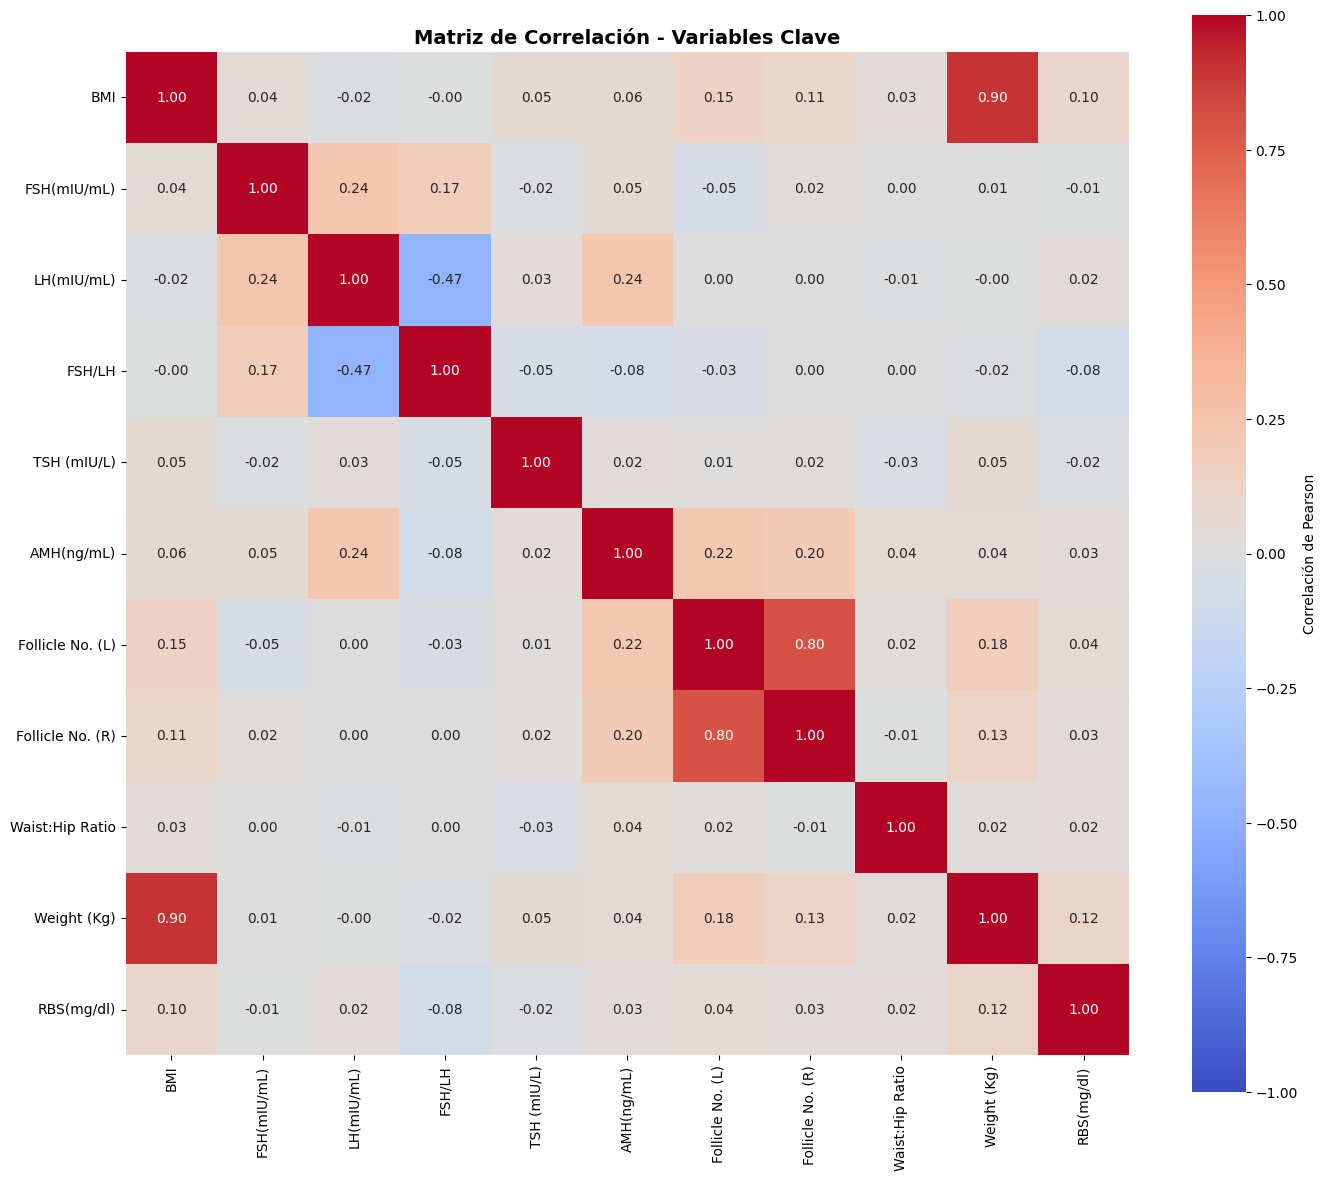


💾 Visualización guardada: matriz_correlacion_heatmap.png

📊 PARTE 7: MULTICOLINEALIDAD (VIF) - TODAS LAS VARIABLES NUMÉRICAS

VIF < 5: OK | VIF 5-10: Moderado | VIF > 10: SEVERO

📊 VIF - TODAS LAS 27 VARIABLES:

              Variable         VIF   Status
           Waist(inch) 1248.321614   SEVERO
             Hip(inch) 1078.140309   SEVERO
       Waist:Hip Ratio  849.871229   SEVERO
   BP _Systolic (mmHg)  252.928374   SEVERO
                   BMI  213.587747   SEVERO
  BP _Diastolic (mmHg)  201.013617   SEVERO
           Weight (Kg)  186.509100   SEVERO
              Hb(g/dl)  178.537186   SEVERO
      RR (breaths/min)  137.619551   SEVERO
  Avg. F size (R) (mm)   34.688706   SEVERO
            RBS(mg/dl)   31.439031   SEVERO
  Avg. F size (L) (mm)   29.207651   SEVERO
      Endometrium (mm)   17.268494   SEVERO
    Cycle length(days)   13.079056   SEVERO
      Follicle No. (R)    9.902415 Moderado
      Follicle No. (L)    9.751897 Moderado
        Vit D3 (ng/mL)    7.069098 Mode

In [6]:
"""
NOTEBOOK 03: ANÁLISIS ESTADÍSTICO COMPLETO - TODAS LAS VARIABLES
=================================================================

Objetivo: Análisis estadístico exhaustivo de TODAS las variables del dataset
Entrada: PCOS_data_winsorized.csv (538 filas)
Incluye: Variables numéricas Y categóricas/binarias
"""

# ================================================================
# CELDA 1: Configuración e imports
# ================================================================

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, normaltest, mannwhitneyu, ttest_ind, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("📊 ANÁLISIS ESTADÍSTICO COMPLETO - TODAS LAS VARIABLES")
print("="*80)

# Cargar datos limpios
df = pd.read_csv('PCOS_data_winsorized.csv')

print(f"\n📊 Dataset cargado:")
print(f"   Filas: {len(df)}")
print(f"   Columnas: {len(df.columns)}")
print(f"   No-SOP: {(df['PCOS (Y/N)']==0).sum()}")
print(f"   SOP: {(df['PCOS (Y/N)']==1).sum()}")

# ================================================================
# CELDA 2: Clasificación de Variables
# ================================================================

print("\n" + "="*80)
print("🔍 CLASIFICACIÓN DE VARIABLES")
print("="*80)

# Excluir variable objetivo
all_vars = [col for col in df.columns if col != 'PCOS (Y/N)']

# Variables categóricas/binarias (0/1, Y/N, códigos)
categorical_vars = [
    'Blood Group',           # 11=A+, 12=A-, 13=B+, etc.
    'Cycle(R/I)',           # 2=Regular, 4=Irregular
    'Pregnant(Y/N)',        # 0/1
    'Weight gain(Y/N)',     # 0/1
    'hair growth(Y/N)',     # 0/1
    'Skin darkening (Y/N)', # 0/1
    'Hair loss(Y/N)',       # 0/1
    'Pimples(Y/N)',         # 0/1
    'Fast food (Y/N)',      # 0/1
    'Reg.Exercise(Y/N)'     # 0/1
]

# Verificar existencia y agregar columnas count
categorical_vars = [col for col in categorical_vars if col in df.columns]

# Variables count (discretas pero numéricas)
count_vars = [
    'No. of abortions',
    'Cycle length(days)',
    'Marraige Status (Yrs)',
    'Follicle No. (L)',
    'Follicle No. (R)'
]
count_vars = [col for col in count_vars if col in df.columns]

# Variables numéricas continuas
numeric_continuous = [
    'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
    'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
    'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)',
    'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
    'Waist:Hip Ratio', 'Endometrium (mm)',
    'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
    'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
    'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
    'Waist(inch)', 'Hip(inch)'
]
numeric_continuous = [col for col in numeric_continuous if col in df.columns]

# Combinar count + continuous para análisis numérico
numeric_vars = count_vars + numeric_continuous

print(f"\n📊 CLASIFICACIÓN:")
print(f"   Variables categóricas/binarias: {len(categorical_vars)}")
print(f"   Variables count (discretas): {len(count_vars)}")
print(f"   Variables numéricas continuas: {len(numeric_continuous)}")
print(f"   TOTAL a analizar: {len(categorical_vars) + len(numeric_vars)}")

print(f"\n📝 Categóricas: {categorical_vars}")
print(f"\n📝 Count: {count_vars}")
print(f"\n📝 Numéricas continuas: {numeric_continuous}")

# ================================================================
# CELDA 3: Estadística Descriptiva - TODAS LAS NUMÉRICAS
# ================================================================

print("\n" + "="*80)
print("📈 PARTE 1: ESTADÍSTICA DESCRIPTIVA - TODAS LAS VARIABLES NUMÉRICAS")
print("="*80)

stats_summary = []

for var in numeric_vars:
    data = df[var].dropna()
    
    stats_summary.append({
        'Variable': var,
        'Tipo': 'Count' if var in count_vars else 'Continua',
        'N': len(data),
        'Media': data.mean(),
        'Mediana': data.median(),
        'Desv_Std': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Q1': data.quantile(0.25),
        'Q3': data.quantile(0.75),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Asimetria': stats.skew(data),
        'Curtosis': stats.kurtosis(data)
    })

stats_df = pd.DataFrame(stats_summary)

print(f"\n📊 ESTADÍSTICAS DE TODAS LAS {len(stats_df)} VARIABLES NUMÉRICAS:\n")
print(stats_df.to_string(index=False))

# Guardar completo
stats_df.to_csv('estadisticas_descriptivas_completo.csv', index=False)
print(f"\n💾 Guardado completo: estadisticas_descriptivas_completo.csv")

# ================================================================
# CELDA 4: Estadística Descriptiva - TODAS LAS CATEGÓRICAS
# ================================================================

print("\n" + "="*80)
print("📈 PARTE 2: ESTADÍSTICA DESCRIPTIVA - TODAS LAS VARIABLES CATEGÓRICAS")
print("="*80)

cat_summary = []

for var in categorical_vars:
    value_counts = df[var].value_counts()
    mode_value = df[var].mode()[0] if len(df[var].mode()) > 0 else np.nan
    n_unique = df[var].nunique()
    
    cat_summary.append({
        'Variable': var,
        'N': len(df[var].dropna()),
        'N_Categorias': n_unique,
        'Moda': mode_value,
        'Moda_Freq': value_counts.iloc[0] if len(value_counts) > 0 else 0,
        'Moda_Pct': (value_counts.iloc[0] / len(df[var].dropna()) * 100) if len(value_counts) > 0 else 0,
        'Distribucion': str(dict(value_counts.head(5)))
    })

cat_df = pd.DataFrame(cat_summary)

print(f"\n📊 ESTADÍSTICAS DE TODAS LAS {len(cat_df)} VARIABLES CATEGÓRICAS:\n")
print(cat_df.to_string(index=False))

# Guardar
cat_df.to_csv('estadisticas_categoricas_completo.csv', index=False)
print(f"\n💾 Guardado: estadisticas_categoricas_completo.csv")

# ================================================================
# CELDA 5: Pruebas de Normalidad - TODAS LAS NUMÉRICAS
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 3: PRUEBAS DE NORMALIDAD - TODAS LAS VARIABLES NUMÉRICAS")
print("="*80)

print("\nShapiro-Wilk test (H0: los datos son normales)")
print("p-value < 0.05 → NO normal | p-value >= 0.05 → Normal\n")

normality_results = []

for var in numeric_vars:
    data = df[var].dropna()
    
    # Shapiro-Wilk test
    stat, p_value = shapiro(data)
    
    is_normal = 'SÍ' if p_value >= 0.05 else 'NO'
    
    normality_results.append({
        'Variable': var,
        'Tipo': 'Count' if var in count_vars else 'Continua',
        'Shapiro_W': stat,
        'P_value': p_value,
        'Normal': is_normal,
        'Interpretacion': 'Normal' if p_value >= 0.05 else 'No Normal'
    })

normality_df = pd.DataFrame(normality_results)

print(f"📊 RESULTADOS DE NORMALIDAD - TODAS LAS {len(normality_df)} VARIABLES:\n")
print(normality_df.to_string(index=False))

# Resumen
n_normal = (normality_df['Normal'] == 'SÍ').sum()
n_total = len(normality_df)
pct_normal = (n_normal / n_total) * 100

print(f"\n📊 RESUMEN:")
print(f"   Variables normales: {n_normal}/{n_total} ({pct_normal:.1f}%)")
print(f"   Variables NO normales: {n_total - n_normal}/{n_total} ({100-pct_normal:.1f}%)")

# Guardar
normality_df.to_csv('pruebas_normalidad_completo.csv', index=False)
print(f"\n💾 Guardado: pruebas_normalidad_completo.csv")

# ================================================================
# CELDA 6: Pruebas de Hipótesis - TODAS LAS NUMÉRICAS
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 4: PRUEBAS DE HIPÓTESIS - TODAS LAS VARIABLES NUMÉRICAS")
print("="*80)

print("\nH0: No hay diferencia entre SOP y No-SOP")
print("H1: Hay diferencia significativa | α = 0.05\n")

hypothesis_results = []

for var in numeric_vars:
    # Datos por grupo
    no_sop = df[df['PCOS (Y/N)'] == 0][var].dropna()
    sop = df[df['PCOS (Y/N)'] == 1][var].dropna()
    
    # Estadísticas por grupo
    mean_no_sop = no_sop.mean()
    mean_sop = sop.mean()
    std_no_sop = no_sop.std()
    std_sop = sop.std()
    median_no_sop = no_sop.median()
    median_sop = sop.median()
    
    # Verificar normalidad
    is_normal = normality_df[normality_df['Variable'] == var]['Normal'].values[0] == 'SÍ'
    
    # Elegir test
    if is_normal:
        stat, p_value = ttest_ind(no_sop, sop)
        test_used = 't-test'
    else:
        stat, p_value = mannwhitneyu(no_sop, sop, alternative='two-sided')
        test_used = 'Mann-Whitney U'
    
    # Cohen's d (effect size)
    pooled_std = np.sqrt(((len(no_sop)-1)*std_no_sop**2 + (len(sop)-1)*std_sop**2) / (len(no_sop)+len(sop)-2))
    cohens_d = (mean_sop - mean_no_sop) / pooled_std if pooled_std > 0 else 0
    
    # Interpretación
    if abs(cohens_d) < 0.2:
        effect_size = 'Pequeño'
    elif abs(cohens_d) < 0.5:
        effect_size = 'Mediano'
    elif abs(cohens_d) < 0.8:
        effect_size = 'Grande'
    else:
        effect_size = 'Muy Grande'
    
    hypothesis_results.append({
        'Variable': var,
        'Tipo': 'Count' if var in count_vars else 'Continua',
        'N_NoSOP': len(no_sop),
        'N_SOP': len(sop),
        'Mean_NoSOP': mean_no_sop,
        'Mean_SOP': mean_sop,
        'Median_NoSOP': median_no_sop,
        'Median_SOP': median_sop,
        'Std_NoSOP': std_no_sop,
        'Std_SOP': std_sop,
        'Test': test_used,
        'Statistic': stat,
        'P_value': p_value,
        'Significativo': 'SÍ' if p_value < 0.05 else 'NO',
        'Cohens_d': cohens_d,
        'Effect_Size': effect_size
    })

hypothesis_df = pd.DataFrame(hypothesis_results)

# Ordenar por p-value
hypothesis_df = hypothesis_df.sort_values('P_value')

print(f"📊 PRUEBAS DE HIPÓTESIS - TODAS LAS {len(hypothesis_df)} VARIABLES:\n")
print(hypothesis_df[['Variable', 'Test', 'P_value', 'Significativo', 'Cohens_d', 'Effect_Size']].to_string(index=False))

# Resumen
n_sig = (hypothesis_df['Significativo'] == 'SÍ').sum()
n_total = len(hypothesis_df)
pct_sig = (n_sig / n_total) * 100

print(f"\n📊 RESUMEN:")
print(f"   Variables significativas (p<0.05): {n_sig}/{n_total} ({pct_sig:.1f}%)")
print(f"   Variables NO significativas: {n_total - n_sig}/{n_total} ({100-pct_sig:.1f}%)")

# Guardar
hypothesis_df.to_csv('pruebas_hipotesis_numericas_completo.csv', index=False)
print(f"\n💾 Guardado: pruebas_hipotesis_numericas_completo.csv")

# ================================================================
# CELDA 7: Chi-Cuadrado - TODAS LAS CATEGÓRICAS
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 5: CHI-CUADRADO - TODAS LAS VARIABLES CATEGÓRICAS")
print("="*80)

print("\nH0: No hay asociación entre variable y SOP")
print("H1: Hay asociación significativa | α = 0.05\n")

chi_results = []

for var in categorical_vars:
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(df[var], df['PCOS (Y/N)'])
    
    # Chi-cuadrado test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Cramér's V (effect size para chi-cuadrado)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape[0], contingency_table.shape[1]) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0
    
    # Interpretación Cramér's V
    if cramers_v < 0.1:
        effect = 'Muy Pequeño'
    elif cramers_v < 0.3:
        effect = 'Pequeño'
    elif cramers_v < 0.5:
        effect = 'Mediano'
    else:
        effect = 'Grande'
    
    chi_results.append({
        'Variable': var,
        'N_Categorias': len(contingency_table),
        'Chi2': chi2,
        'P_value': p_value,
        'DOF': dof,
        'Significativo': 'SÍ' if p_value < 0.05 else 'NO',
        'Cramers_V': cramers_v,
        'Effect_Size': effect,
        'Tabla_Contingencia': str(contingency_table.to_dict())
    })

chi_df = pd.DataFrame(chi_results)

# Ordenar por p-value
chi_df = chi_df.sort_values('P_value')

print(f"📊 CHI-CUADRADO - TODAS LAS {len(chi_df)} VARIABLES CATEGÓRICAS:\n")
print(chi_df[['Variable', 'Chi2', 'P_value', 'Significativo', 'Cramers_V', 'Effect_Size']].to_string(index=False))

# Resumen
n_sig_cat = (chi_df['Significativo'] == 'SÍ').sum()
n_total_cat = len(chi_df)
pct_sig_cat = (n_sig_cat / n_total_cat) * 100

print(f"\n📊 RESUMEN:")
print(f"   Variables asociadas con SOP (p<0.05): {n_sig_cat}/{n_total_cat} ({pct_sig_cat:.1f}%)")
print(f"   Variables NO asociadas: {n_total_cat - n_sig_cat}/{n_total_cat} ({100-pct_sig_cat:.1f}%)")

# Guardar
chi_df.to_csv('chi_cuadrado_categoricas_completo.csv', index=False)
print(f"\n💾 Guardado: chi_cuadrado_categoricas_completo.csv")

# ================================================================
# CELDA 8: Matriz de Correlación - TODAS LAS NUMÉRICAS
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 6: MATRIZ DE CORRELACIÓN - TODAS LAS VARIABLES NUMÉRICAS")
print("="*80)

# Matriz completa
corr_matrix = df[numeric_vars].corr()

print(f"\n📊 Matriz de correlación ({len(numeric_vars)} variables)")
print(f"   Tamaño: {corr_matrix.shape}")

# Guardar matriz completa
corr_matrix.to_csv('matriz_correlacion_completa.csv')
print(f"💾 Guardado: matriz_correlacion_completa.csv")

# Identificar correlaciones fuertes (|r| > 0.7)
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_corr.append({
                'Var1': corr_matrix.columns[i],
                'Var2': corr_matrix.columns[j],
                'Correlacion': corr_val,
                'Abs_Corr': abs(corr_val)
            })

if len(strong_corr) > 0:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values('Abs_Corr', ascending=False)
    print(f"\n⚠️ CORRELACIONES FUERTES DETECTADAS (|r| > 0.7): {len(strong_corr)} pares\n")
    print(strong_corr_df.to_string(index=False))
    strong_corr_df.to_csv('correlaciones_fuertes.csv', index=False)
    print(f"\n💾 Guardado: correlaciones_fuertes.csv")
else:
    print(f"\n✅ No se detectaron correlaciones fuertes (|r| > 0.7)")

# Visualización (solo variables más relevantes para legibilidad)
key_vars = [
    'BMI', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)',
    'AMH(ng/mL)', 'Follicle No. (L)', 'Follicle No. (R)',
    'Waist:Hip Ratio', 'Weight (Kg)', 'RBS(mg/dl)', 'Age (yrs)'
]
key_vars = [v for v in key_vars if v in corr_matrix.columns]

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix[key_vars].loc[key_vars], 
            annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True,
            cbar_kws={'label': 'Correlación de Pearson'})
plt.title('Matriz de Correlación - Variables Clave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('matriz_correlacion_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"\n💾 Visualización guardada: matriz_correlacion_heatmap.png")

# ================================================================
# CELDA 9: VIF - TODAS LAS NUMÉRICAS
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 7: MULTICOLINEALIDAD (VIF) - TODAS LAS VARIABLES NUMÉRICAS")
print("="*80)

from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\nVIF < 5: OK | VIF 5-10: Moderado | VIF > 10: SEVERO\n")

# Preparar datos (sin nulos)
X = df[numeric_vars].dropna()

# Calcular VIF
vif_data = []
for i, col in enumerate(X.columns):
    try:
        vif = variance_inflation_factor(X.values, i)
        status = 'OK' if vif < 5 else 'Moderado' if vif < 10 else 'SEVERO'
        vif_data.append({
            'Variable': col,
            'VIF': vif,
            'Status': status
        })
    except:
        vif_data.append({
            'Variable': col,
            'VIF': np.nan,
            'Status': 'ERROR'
        })

vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

print(f"📊 VIF - TODAS LAS {len(vif_df)} VARIABLES:\n")
print(vif_df.to_string(index=False))

# Resumen
n_ok = (vif_df['Status'] == 'OK').sum()
n_mod = (vif_df['Status'] == 'Moderado').sum()
n_sev = (vif_df['Status'] == 'SEVERO').sum()

print(f"\n📊 RESUMEN:")
print(f"   VIF < 5 (OK): {n_ok}/{len(vif_df)}")
print(f"   VIF 5-10 (Moderado): {n_mod}/{len(vif_df)}")
print(f"   VIF > 10 (SEVERO): {n_sev}/{len(vif_df)}")

if n_sev > 0:
    print(f"\n⚠️ {n_sev} variables con multicolinealidad severa")
    print(f"   Considerar eliminar o combinar")
else:
    print(f"\n✅ Sin problemas severos de multicolinealidad")

# Guardar
vif_df.to_csv('analisis_vif_completo.csv', index=False)
print(f"\n💾 Guardado: analisis_vif_completo.csv")

# ================================================================
# CELDA 10: Resumen Ejecutivo Final
# ================================================================

print("\n" + "="*80)
print("📊 RESUMEN EJECUTIVO FINAL - ANÁLISIS COMPLETO")
print("="*80)

print(f"\n1. ESTADÍSTICA DESCRIPTIVA:")
print(f"   ✅ Variables numéricas analizadas: {len(numeric_vars)}")
print(f"   ✅ Variables categóricas analizadas: {len(categorical_vars)}")
print(f"   📄 Archivos: estadisticas_descriptivas_completo.csv, estadisticas_categoricas_completo.csv")

print(f"\n2. PRUEBAS DE NORMALIDAD (Numéricas):")
print(f"   ✅ Variables normales: {n_normal}/{len(normality_df)} ({pct_normal:.1f}%)")
print(f"   ⚠️ Variables NO normales: {len(normality_df)-n_normal}/{len(normality_df)} ({100-pct_normal:.1f}%)")
print(f"   📄 Archivo: pruebas_normalidad_completo.csv")

print(f"\n3. PRUEBAS DE HIPÓTESIS (Numéricas):")
print(f"   ✅ Variables significativas: {n_sig}/{len(hypothesis_df)} ({pct_sig:.1f}%)")
print(f"   📊 Tests: t-test y Mann-Whitney U")
print(f"   📄 Archivo: pruebas_hipotesis_numericas_completo.csv")

print(f"\n4. CHI-CUADRADO (Categóricas):")
print(f"   ✅ Variables asociadas con SOP: {n_sig_cat}/{len(chi_df)} ({pct_sig_cat:.1f}%)")
print(f"   📊 Effect size: Cramér's V")
print(f"   📄 Archivo: chi_cuadrado_categoricas_completo.csv")

print(f"\n5. CORRELACIONES (Numéricas):")
if len(strong_corr) > 0:
    print(f"   ⚠️ {len(strong_corr)} pares con correlación fuerte (|r| > 0.7)")
    print(f"   📄 Archivo: correlaciones_fuertes.csv")
else:
    print(f"   ✅ Sin correlaciones preocupantes")
print(f"   📄 Archivo: matriz_correlacion_completa.csv")
print(f"   🖼️ Visualización: matriz_correlacion_heatmap.png")

print(f"\n6. MULTICOLINEALIDAD (VIF - Numéricas):")
if n_sev > 0:
    print(f"   ⚠️ {n_sev} variables con VIF > 10 (SEVERO)")
elif n_mod > 0:
    print(f"   ⚠️ {n_mod} variables con VIF 5-10 (MODERADO)")
else:
    print(f"   ✅ Sin problemas (VIF < 5)")
print(f"   📄 Archivo: analisis_vif_completo.csv")

print(f"\n" + "="*80)
print(f"✅ ANÁLISIS ESTADÍSTICO COMPLETO FINALIZADO")
print(f"   Total variables analizadas: {len(numeric_vars) + len(categorical_vars)}")
print(f"   Variables significativas/asociadas: {n_sig + n_sig_cat}")
print(f"   🎯 Siguiente paso: Feature engineering o selección de variables")
print("="*80)

📊 ANÁLISIS ESTADÍSTICO COMPLETO - TODAS LAS VARIABLES

📊 Dataset cargado:
   Filas: 538
   Columnas: 42
   No-SOP: 362
   SOP: 176

🔍 CLASIFICACIÓN DE VARIABLES

📊 CLASIFICACIÓN:
   Variables categóricas/binarias: 10
   Variables count (discretas): 5
   Variables numéricas continuas: 26
   TOTAL a analizar: 41

📈 PARTE 1: ESTADÍSTICA DESCRIPTIVA - TODAS LAS VARIABLES NUMÉRICAS

📊 ESTADÍSTICAS DE TODAS LAS 31 VARIABLES NUMÉRICAS:

                     Variable     Tipo   N      Media  Mediana    Desv_Std     Min      Max       Q1       Q3      IQR  Asimetria   Curtosis
               Número Abortos    Count 538   0.289963    0.000    0.694171   0.000     5.00   0.0000   0.0000   0.0000   2.952104  10.009620
        Duración Ciclo (días)    Count 538   4.938662    5.000    1.495478   0.000    12.00   4.0000   5.0000   1.0000   0.827102   4.252700
                  Años Casada    Count 538   7.687175    7.000    4.799663   0.000    30.00   4.0000  10.0000   6.0000   1.146239   1.861802
  

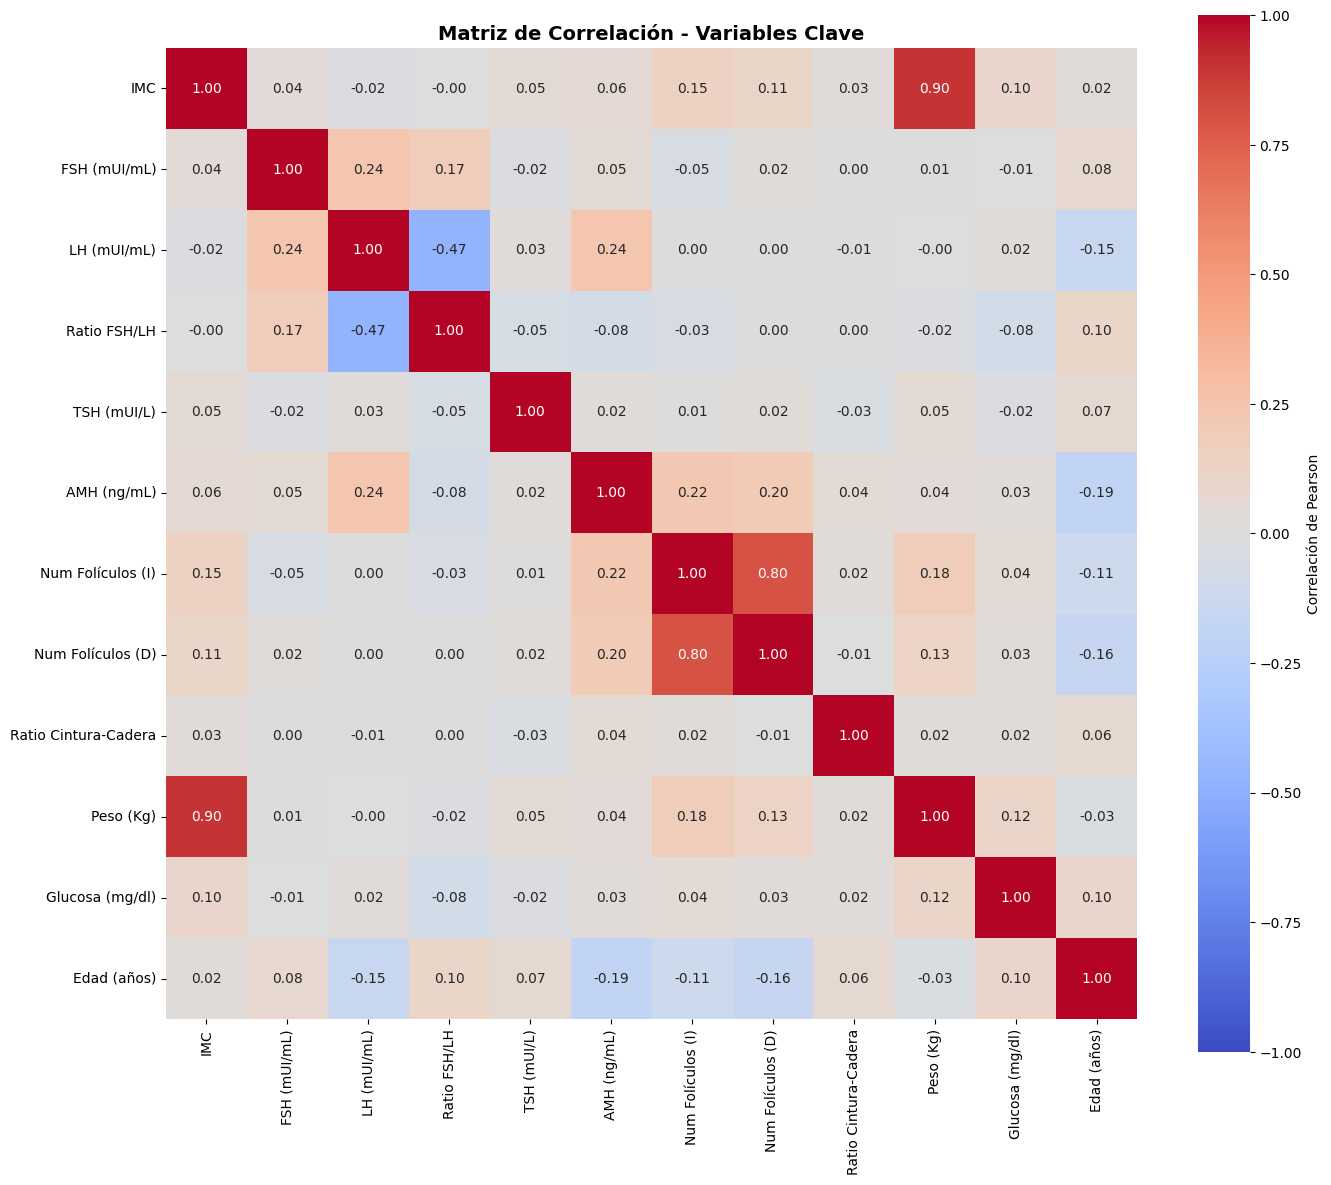


💾 Visualización: 08_matriz_correlacion_heatmap.png

📊 PARTE 7: MULTICOLINEALIDAD (VIF) - TODAS LAS NUMÉRICAS

VIF < 5: OK | VIF 5-10: Moderado | VIF > 10: SEVERO

📊 VIF - TODAS LAS 31 VARIABLES:

                     Variable          VIF   Status
         Ratio Cintura-Cadera 14223.322185   SEVERO
                  Altura (cm) 14179.430564   SEVERO
                Cadera (pulg) 13810.044137   SEVERO
               Cintura (pulg) 13613.946670   SEVERO
                          IMC  3555.976804   SEVERO
                    Peso (Kg)  3543.286744   SEVERO
    Frecuencia Cardiaca (lpm)   308.060803   SEVERO
     Presión Sistólica (mmHg)   259.008230   SEVERO
    Presión Diastólica (mmHg)   202.989324   SEVERO
           Hemoglobina (g/dl)   179.583352   SEVERO
Frecuencia Respiratoria (rpm)   153.233504   SEVERO
                  Edad (años)    70.298859   SEVERO
Tamaño Folículo Prom (D) (mm)    34.874003   SEVERO
              Glucosa (mg/dl)    31.958602   SEVERO
Tamaño Folículo Prom (I

In [7]:
"""
NOTEBOOK 03: ANÁLISIS ESTADÍSTICO COMPLETO - ESPAÑOL
====================================================

Objetivo: Análisis estadístico exhaustivo de TODAS las variables
Entrada: PCOS_data_espanol.csv (538 filas, nombres en español)
Incluye: Variables numéricas Y categóricas/binarias
"""

# ================================================================
# CELDA 1: Configuración e imports
# ================================================================

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, normaltest, mannwhitneyu, ttest_ind, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("📊 ANÁLISIS ESTADÍSTICO COMPLETO - TODAS LAS VARIABLES")
print("="*80)

# Cargar datos en español
df = pd.read_csv('PCOS_data_espanol.csv')

print(f"\n📊 Dataset cargado:")
print(f"   Filas: {len(df)}")
print(f"   Columnas: {len(df.columns)}")
print(f"   No-SOP: {(df['SOP (S/N)']==0).sum()}")
print(f"   SOP: {(df['SOP (S/N)']==1).sum()}")

# ================================================================
# CELDA 2: Clasificación de Variables
# ================================================================

print("\n" + "="*80)
print("🔍 CLASIFICACIÓN DE VARIABLES")
print("="*80)

# Excluir variable objetivo
all_vars = [col for col in df.columns if col != 'SOP (S/N)']

# Variables categóricas/binarias
categorical_vars = [
    'Grupo Sanguíneo',
    'Ciclo (R/I)',
    'Embarazada (S/N)',
    'Aumento Peso (S/N)',
    'Crecimiento Vello (S/N)',
    'Oscurecimiento Piel (S/N)',
    'Pérdida Cabello (S/N)',
    'Acné (S/N)',
    'Comida Rápida (S/N)',
    'Ejercicio Regular (S/N)'
]

# Variables count (discretas)
count_vars = [
    'Número Abortos',
    'Duración Ciclo (días)',
    'Años Casada',
    'Num Folículos (I)',
    'Num Folículos (D)'
]

# Variables numéricas continuas
numeric_continuous = [
    'Edad (años)',
    'Peso (Kg)',
    'Altura (cm)',
    'IMC',
    'Frecuencia Cardiaca (lpm)',
    'Frecuencia Respiratoria (rpm)',
    'Hemoglobina (g/dl)',
    'beta-HCG I (mUI/mL)',
    'beta-HCG II (mUI/mL)',
    'FSH (mUI/mL)',
    'LH (mUI/mL)',
    'Ratio FSH/LH',
    'Cadera (pulg)',
    'Cintura (pulg)',
    'Ratio Cintura-Cadera',
    'TSH (mUI/L)',
    'AMH (ng/mL)',
    'Prolactina (ng/mL)',
    'Vitamina D3 (ng/mL)',
    'Progesterona (ng/mL)',
    'Glucosa (mg/dl)',
    'Presión Sistólica (mmHg)',
    'Presión Diastólica (mmHg)',
    'Tamaño Folículo Prom (I) (mm)',
    'Tamaño Folículo Prom (D) (mm)',
    'Endometrio (mm)'
]

# Combinar count + continuous para análisis numérico
numeric_vars = count_vars + numeric_continuous

print(f"\n📊 CLASIFICACIÓN:")
print(f"   Variables categóricas/binarias: {len(categorical_vars)}")
print(f"   Variables count (discretas): {len(count_vars)}")
print(f"   Variables numéricas continuas: {len(numeric_continuous)}")
print(f"   TOTAL a analizar: {len(categorical_vars) + len(numeric_vars)}")

# ================================================================
# CELDA 3: Estadística Descriptiva - TODAS LAS NUMÉRICAS
# ================================================================

print("\n" + "="*80)
print("📈 PARTE 1: ESTADÍSTICA DESCRIPTIVA - TODAS LAS VARIABLES NUMÉRICAS")
print("="*80)

stats_summary = []

for var in numeric_vars:
    data = df[var].dropna()
    
    stats_summary.append({
        'Variable': var,
        'Tipo': 'Count' if var in count_vars else 'Continua',
        'N': len(data),
        'Media': data.mean(),
        'Mediana': data.median(),
        'Desv_Std': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Q1': data.quantile(0.25),
        'Q3': data.quantile(0.75),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Asimetria': stats.skew(data),
        'Curtosis': stats.kurtosis(data)
    })

stats_df = pd.DataFrame(stats_summary)

print(f"\n📊 ESTADÍSTICAS DE TODAS LAS {len(stats_df)} VARIABLES NUMÉRICAS:\n")
print(stats_df.to_string(index=False))

# Guardar completo
stats_df.to_csv('01_estadisticas_descriptivas_numericas.csv', index=False)
print(f"\n💾 Guardado: 01_estadisticas_descriptivas_numericas.csv")

# ================================================================
# CELDA 4: Estadística Descriptiva - TODAS LAS CATEGÓRICAS
# ================================================================

print("\n" + "="*80)
print("📈 PARTE 2: ESTADÍSTICA DESCRIPTIVA - TODAS LAS VARIABLES CATEGÓRICAS")
print("="*80)

cat_summary = []

for var in categorical_vars:
    value_counts = df[var].value_counts()
    mode_value = df[var].mode()[0] if len(df[var].mode()) > 0 else np.nan
    n_unique = df[var].nunique()
    
    cat_summary.append({
        'Variable': var,
        'N': len(df[var].dropna()),
        'N_Categorias': n_unique,
        'Moda': mode_value,
        'Moda_Freq': value_counts.iloc[0] if len(value_counts) > 0 else 0,
        'Moda_Pct': (value_counts.iloc[0] / len(df[var].dropna()) * 100) if len(value_counts) > 0 else 0,
        'Distribucion': str(dict(value_counts.head(5)))
    })

cat_df = pd.DataFrame(cat_summary)

print(f"\n📊 ESTADÍSTICAS DE TODAS LAS {len(cat_df)} VARIABLES CATEGÓRICAS:\n")
print(cat_df.to_string(index=False))

# Guardar
cat_df.to_csv('02_estadisticas_descriptivas_categoricas.csv', index=False)
print(f"\n💾 Guardado: 02_estadisticas_descriptivas_categoricas.csv")

# ================================================================
# CELDA 5: Pruebas de Normalidad - TODAS LAS NUMÉRICAS
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 3: PRUEBAS DE NORMALIDAD - TODAS LAS VARIABLES NUMÉRICAS")
print("="*80)

print("\nShapiro-Wilk test (H0: los datos son normales)")
print("p-value < 0.05 → NO normal | p-value >= 0.05 → Normal\n")

normality_results = []

for var in numeric_vars:
    data = df[var].dropna()
    
    # Shapiro-Wilk test
    stat, p_value = shapiro(data)
    
    is_normal = 'SÍ' if p_value >= 0.05 else 'NO'
    
    normality_results.append({
        'Variable': var,
        'Tipo': 'Count' if var in count_vars else 'Continua',
        'Shapiro_W': stat,
        'P_value': p_value,
        'Normal': is_normal,
        'Interpretacion': 'Normal' if p_value >= 0.05 else 'No Normal'
    })

normality_df = pd.DataFrame(normality_results)

print(f"📊 NORMALIDAD - TODAS LAS {len(normality_df)} VARIABLES:\n")
print(normality_df[['Variable', 'Tipo', 'P_value', 'Normal']].to_string(index=False))

# Resumen
n_normal = (normality_df['Normal'] == 'SÍ').sum()
n_total = len(normality_df)
pct_normal = (n_normal / n_total) * 100

print(f"\n📊 RESUMEN:")
print(f"   Variables normales: {n_normal}/{n_total} ({pct_normal:.1f}%)")
print(f"   Variables NO normales: {n_total - n_normal}/{n_total} ({100-pct_normal:.1f}%)")

# Guardar
normality_df.to_csv('03_pruebas_normalidad.csv', index=False)
print(f"\n💾 Guardado: 03_pruebas_normalidad.csv")

# ================================================================
# CELDA 6: Pruebas de Hipótesis - TODAS LAS NUMÉRICAS
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 4: PRUEBAS DE HIPÓTESIS - TODAS LAS VARIABLES NUMÉRICAS")
print("="*80)

print("\nH0: No hay diferencia entre SOP y No-SOP")
print("H1: Hay diferencia significativa | α = 0.05\n")

hypothesis_results = []

for var in numeric_vars:
    # Datos por grupo
    no_sop = df[df['SOP (S/N)'] == 0][var].dropna()
    sop = df[df['SOP (S/N)'] == 1][var].dropna()
    
    # Estadísticas por grupo
    mean_no_sop = no_sop.mean()
    mean_sop = sop.mean()
    std_no_sop = no_sop.std()
    std_sop = sop.std()
    median_no_sop = no_sop.median()
    median_sop = sop.median()
    
    # Verificar normalidad
    is_normal = normality_df[normality_df['Variable'] == var]['Normal'].values[0] == 'SÍ'
    
    # Elegir test
    if is_normal:
        stat, p_value = ttest_ind(no_sop, sop)
        test_used = 't-test'
    else:
        stat, p_value = mannwhitneyu(no_sop, sop, alternative='two-sided')
        test_used = 'Mann-Whitney U'
    
    # Cohen's d (effect size)
    pooled_std = np.sqrt(((len(no_sop)-1)*std_no_sop**2 + (len(sop)-1)*std_sop**2) / (len(no_sop)+len(sop)-2))
    cohens_d = (mean_sop - mean_no_sop) / pooled_std if pooled_std > 0 else 0
    
    # Interpretación
    if abs(cohens_d) < 0.2:
        effect_size = 'Pequeño'
    elif abs(cohens_d) < 0.5:
        effect_size = 'Mediano'
    elif abs(cohens_d) < 0.8:
        effect_size = 'Grande'
    else:
        effect_size = 'Muy Grande'
    
    hypothesis_results.append({
        'Variable': var,
        'Tipo': 'Count' if var in count_vars else 'Continua',
        'N_NoSOP': len(no_sop),
        'N_SOP': len(sop),
        'Mean_NoSOP': mean_no_sop,
        'Mean_SOP': mean_sop,
        'Median_NoSOP': median_no_sop,
        'Median_SOP': median_sop,
        'Std_NoSOP': std_no_sop,
        'Std_SOP': std_sop,
        'Test': test_used,
        'Statistic': stat,
        'P_value': p_value,
        'Significativo': 'SÍ' if p_value < 0.05 else 'NO',
        'Cohens_d': cohens_d,
        'Effect_Size': effect_size
    })

hypothesis_df = pd.DataFrame(hypothesis_results)

# Ordenar por p-value
hypothesis_df = hypothesis_df.sort_values('P_value')

print(f"📊 PRUEBAS DE HIPÓTESIS - TODAS LAS {len(hypothesis_df)} VARIABLES:\n")
print(hypothesis_df[['Variable', 'Test', 'P_value', 'Significativo', 'Cohens_d', 'Effect_Size']].to_string(index=False))

# Resumen
n_sig = (hypothesis_df['Significativo'] == 'SÍ').sum()
n_total = len(hypothesis_df)
pct_sig = (n_sig / n_total) * 100

print(f"\n📊 RESUMEN:")
print(f"   Variables significativas (p<0.05): {n_sig}/{n_total} ({pct_sig:.1f}%)")
print(f"   Variables NO significativas: {n_total - n_sig}/{n_total} ({100-pct_sig:.1f}%)")

# Guardar
hypothesis_df.to_csv('04_pruebas_hipotesis_numericas.csv', index=False)
print(f"\n💾 Guardado: 04_pruebas_hipotesis_numericas.csv")

# ================================================================
# CELDA 7: Chi-Cuadrado - TODAS LAS CATEGÓRICAS
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 5: CHI-CUADRADO - TODAS LAS VARIABLES CATEGÓRICAS")
print("="*80)

print("\nH0: No hay asociación entre variable y SOP")
print("H1: Hay asociación significativa | α = 0.05\n")

chi_results = []

for var in categorical_vars:
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(df[var], df['SOP (S/N)'])
    
    # Chi-cuadrado test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Cramér's V (effect size)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape[0], contingency_table.shape[1]) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0
    
    # Interpretación Cramér's V
    if cramers_v < 0.1:
        effect = 'Muy Pequeño'
    elif cramers_v < 0.3:
        effect = 'Pequeño'
    elif cramers_v < 0.5:
        effect = 'Mediano'
    else:
        effect = 'Grande'
    
    chi_results.append({
        'Variable': var,
        'N_Categorias': len(contingency_table),
        'Chi2': chi2,
        'P_value': p_value,
        'DOF': dof,
        'Significativo': 'SÍ' if p_value < 0.05 else 'NO',
        'Cramers_V': cramers_v,
        'Effect_Size': effect,
        'Tabla_Contingencia': str(contingency_table.to_dict())
    })

chi_df = pd.DataFrame(chi_results)

# Ordenar por p-value
chi_df = chi_df.sort_values('P_value')

print(f"📊 CHI-CUADRADO - TODAS LAS {len(chi_df)} VARIABLES CATEGÓRICAS:\n")
print(chi_df[['Variable', 'Chi2', 'P_value', 'Significativo', 'Cramers_V', 'Effect_Size']].to_string(index=False))

# Resumen
n_sig_cat = (chi_df['Significativo'] == 'SÍ').sum()
n_total_cat = len(chi_df)
pct_sig_cat = (n_sig_cat / n_total_cat) * 100

print(f"\n📊 RESUMEN:")
print(f"   Variables asociadas con SOP (p<0.05): {n_sig_cat}/{n_total_cat} ({pct_sig_cat:.1f}%)")
print(f"   Variables NO asociadas: {n_total_cat - n_sig_cat}/{n_total_cat} ({100-pct_sig_cat:.1f}%)")

# Guardar
chi_df.to_csv('05_chi_cuadrado_categoricas.csv', index=False)
print(f"\n💾 Guardado: 05_chi_cuadrado_categoricas.csv")

# ================================================================
# CELDA 8: Matriz de Correlación - TODAS LAS NUMÉRICAS
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 6: CORRELACIONES - TODAS LAS VARIABLES NUMÉRICAS")
print("="*80)

# Matriz completa
corr_matrix = df[numeric_vars].corr()

print(f"\n📊 Matriz de correlación ({len(numeric_vars)} variables)")
print(f"   Tamaño: {corr_matrix.shape}")

# Guardar matriz completa
corr_matrix.to_csv('06_matriz_correlacion_completa.csv')
print(f"💾 Guardado: 06_matriz_correlacion_completa.csv")

# Identificar correlaciones fuertes (|r| > 0.7)
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_corr.append({
                'Var1': corr_matrix.columns[i],
                'Var2': corr_matrix.columns[j],
                'Correlacion': corr_val,
                'Abs_Corr': abs(corr_val)
            })

if len(strong_corr) > 0:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values('Abs_Corr', ascending=False)
    print(f"\n⚠️ CORRELACIONES FUERTES (|r| > 0.7): {len(strong_corr)} pares\n")
    print(strong_corr_df.to_string(index=False))
    strong_corr_df.to_csv('07_correlaciones_fuertes.csv', index=False)
    print(f"\n💾 Guardado: 07_correlaciones_fuertes.csv")
else:
    print(f"\n✅ No hay correlaciones fuertes (|r| > 0.7)")

# Visualización (variables clave)
key_vars = [
    'IMC', 'FSH (mUI/mL)', 'LH (mUI/mL)', 'Ratio FSH/LH', 'TSH (mUI/L)',
    'AMH (ng/mL)', 'Num Folículos (I)', 'Num Folículos (D)',
    'Ratio Cintura-Cadera', 'Peso (Kg)', 'Glucosa (mg/dl)', 'Edad (años)'
]
key_vars = [v for v in key_vars if v in corr_matrix.columns]

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix[key_vars].loc[key_vars], 
            annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True,
            cbar_kws={'label': 'Correlación de Pearson'})
plt.title('Matriz de Correlación - Variables Clave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('08_matriz_correlacion_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"\n💾 Visualización: 08_matriz_correlacion_heatmap.png")

# ================================================================
# CELDA 9: VIF - TODAS LAS NUMÉRICAS
# ================================================================

print("\n" + "="*80)
print("📊 PARTE 7: MULTICOLINEALIDAD (VIF) - TODAS LAS NUMÉRICAS")
print("="*80)

from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\nVIF < 5: OK | VIF 5-10: Moderado | VIF > 10: SEVERO\n")

# Preparar datos (sin nulos)
X = df[numeric_vars].dropna()

# Calcular VIF
vif_data = []
for i, col in enumerate(X.columns):
    try:
        vif = variance_inflation_factor(X.values, i)
        status = 'OK' if vif < 5 else 'Moderado' if vif < 10 else 'SEVERO'
        vif_data.append({
            'Variable': col,
            'VIF': vif,
            'Status': status
        })
    except:
        vif_data.append({
            'Variable': col,
            'VIF': np.nan,
            'Status': 'ERROR'
        })

vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

print(f"📊 VIF - TODAS LAS {len(vif_df)} VARIABLES:\n")
print(vif_df.to_string(index=False))

# Resumen
n_ok = (vif_df['Status'] == 'OK').sum()
n_mod = (vif_df['Status'] == 'Moderado').sum()
n_sev = (vif_df['Status'] == 'SEVERO').sum()

print(f"\n📊 RESUMEN:")
print(f"   VIF < 5 (OK): {n_ok}/{len(vif_df)}")
print(f"   VIF 5-10 (Moderado): {n_mod}/{len(vif_df)}")
print(f"   VIF > 10 (SEVERO): {n_sev}/{len(vif_df)}")

if n_sev > 0:
    print(f"\n⚠️ {n_sev} variables con multicolinealidad severa")
    print(f"   Considerar eliminar o combinar")
else:
    print(f"\n✅ Sin problemas severos")

# Guardar
vif_df.to_csv('09_analisis_vif.csv', index=False)
print(f"\n💾 Guardado: 09_analisis_vif.csv")

# ================================================================
# CELDA 10: Resumen Ejecutivo Final
# ================================================================

print("\n" + "="*80)
print("📊 RESUMEN EJECUTIVO FINAL - ANÁLISIS COMPLETO")
print("="*80)

print(f"\n1. ESTADÍSTICA DESCRIPTIVA:")
print(f"   ✅ Variables numéricas: {len(numeric_vars)}")
print(f"   ✅ Variables categóricas: {len(categorical_vars)}")
print(f"   📄 01_estadisticas_descriptivas_numericas.csv")
print(f"   📄 02_estadisticas_descriptivas_categoricas.csv")

print(f"\n2. NORMALIDAD (Numéricas):")
print(f"   ✅ Normales: {n_normal}/{len(normality_df)} ({pct_normal:.1f}%)")
print(f"   ⚠️ NO normales: {len(normality_df)-n_normal}/{len(normality_df)} ({100-pct_normal:.1f}%)")
print(f"   📄 03_pruebas_normalidad.csv")

print(f"\n3. HIPÓTESIS (Numéricas):")
print(f"   ✅ Significativas: {n_sig}/{len(hypothesis_df)} ({pct_sig:.1f}%)")
print(f"   📄 04_pruebas_hipotesis_numericas.csv")

print(f"\n4. CHI-CUADRADO (Categóricas):")
print(f"   ✅ Asociadas con SOP: {n_sig_cat}/{len(chi_df)} ({pct_sig_cat:.1f}%)")
print(f"   📄 05_chi_cuadrado_categoricas.csv")

print(f"\n5. CORRELACIONES:")
if len(strong_corr) > 0:
    print(f"   ⚠️ Correlaciones fuertes: {len(strong_corr)} pares")
    print(f"   📄 07_correlaciones_fuertes.csv")
else:
    print(f"   ✅ Sin correlaciones preocupantes")
print(f"   📄 06_matriz_correlacion_completa.csv")
print(f"   🖼️ 08_matriz_correlacion_heatmap.png")

print(f"\n6. MULTICOLINEALIDAD (VIF):")
if n_sev > 0:
    print(f"   ⚠️ VIF > 10: {n_sev} variables")
elif n_mod > 0:
    print(f"   ⚠️ VIF 5-10: {n_mod} variables")
else:
    print(f"   ✅ Sin problemas (VIF < 5)")
print(f"   📄 09_analisis_vif.csv")

print(f"\n" + "="*80)
print(f"✅ ANÁLISIS ESTADÍSTICO COMPLETADO")
print(f"   Total variables analizadas: {len(numeric_vars) + len(categorical_vars)} de 41")
print(f"   Variables significativas/asociadas: {n_sig + n_sig_cat}")
print(f"   Archivos generados: 9")
print(f"   🎯 Siguiente: Feature engineering o selección de variables")
print("="*80)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cargar dataset
df = pd.read_csv('PCOS_data_espanol.csv')

# Variables numéricas (sin el target)
numeric_vars = df.select_dtypes(include=[np.number]).columns.drop('SOP (S/N)').tolist()

print(f"Total variables: {len(numeric_vars)}")

# =============================================================================
# MÉTRICAS DE NORMALIDAD - TODAS
# =============================================================================
metrics = []
for var in numeric_vars:
    data = df[var].dropna()
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    shapiro_stat, shapiro_p = stats.shapiro(data) if len(data) < 5000 else (np.nan, np.nan)
    
    metrics.append({
        'Variable': var,
        'N': len(data),
        'Mean': data.mean(),
        'Median': data.median(),
        'Std': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Skewness': skew,
        'Kurtosis': kurt,
        'Shapiro_Stat': shapiro_stat,
        'Shapiro_P': shapiro_p
    })

df_metrics = pd.DataFrame(metrics)
df_metrics.to_csv('metricas_normalidad_TODAS.csv', index=False)
print("✓ Guardado: metricas_normalidad_TODAS.csv")

# =============================================================================
# VISUALIZACIÓN: TODAS LAS VARIABLES (Histograma + Q-Q)
# =============================================================================
print(f"\nGenerando {len(numeric_vars)} visualizaciones...")

# 1 figura por variable (2 subplots)
for i, var in enumerate(numeric_vars):
    data = df[var].dropna()
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # HISTOGRAMA
    axes[0].hist(data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0].axvline(data.mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Media: {data.mean():.2f}')
    axes[0].axvline(data.median(), color='orange', linestyle='--', linewidth=2, 
                    label=f'Mediana: {data.median():.2f}')
    axes[0].set_title(f'{var}\nSkew: {skew:.3f} | Kurt: {kurt:.3f} | n={len(data)}')
    axes[0].set_xlabel('Valor')
    axes[0].set_ylabel('Frecuencia')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Q-Q PLOT
    stats.probplot(data, dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot - Normal')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'dist_{i+1:02d}_{var.replace("/", "_").replace(" ", "_")}.png', 
                dpi=300, bbox_inches='tight')
    plt.close()
    
    if (i+1) % 10 == 0:
        print(f"  Procesadas: {i+1}/{len(numeric_vars)}")

print(f"✓ Guardadas {len(numeric_vars)} figuras individuales")

# =============================================================================
# BOXPLOTS POR GRUPO SOP - TODAS
# =============================================================================
print("\nGenerando boxplots SOP vs No-SOP para TODAS las variables...")

for i, var in enumerate(numeric_vars):
    df_plot = df[[var, 'SOP (S/N)']].dropna()
    df_plot['Grupo'] = df_plot['SOP (S/N)'].map({0: 'No-SOP', 1: 'SOP'})
    
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.boxplot(data=df_plot, x='Grupo', y=var, ax=ax, palette=['lightblue', 'salmon'])
    ax.set_title(f'{var} por Grupo', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Agregar estadísticas
    mean_no = df_plot[df_plot['Grupo']=='No-SOP'][var].mean()
    mean_si = df_plot[df_plot['Grupo']=='SOP'][var].mean()
    ax.text(0.02, 0.98, f'No-SOP: {mean_no:.2f}\nSOP: {mean_si:.2f}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(f'box_{i+1:02d}_{var.replace("/", "_").replace(" ", "_")}.png', 
                dpi=300, bbox_inches='tight')
    plt.close()
    
    if (i+1) % 10 == 0:
        print(f"  Procesados: {i+1}/{len(numeric_vars)}")

print(f"✓ Guardados {len(numeric_vars)} boxplots")

print("\n" + "="*80)
print("ARCHIVOS GENERADOS:")
print("="*80)
print(f"✓ 1 CSV con métricas de TODAS las variables")
print(f"✓ {len(numeric_vars)} figuras de distribución (histograma + Q-Q)")
print(f"✓ {len(numeric_vars)} boxplots por grupo SOP")
print(f"TOTAL: {len(numeric_vars)*2 + 1} archivos")

Total variables: 41
✓ Guardado: metricas_normalidad_TODAS.csv

Generando 41 visualizaciones...
  Procesadas: 10/41
  Procesadas: 20/41
  Procesadas: 30/41
  Procesadas: 40/41
✓ Guardadas 41 figuras individuales

Generando boxplots SOP vs No-SOP para TODAS las variables...
  Procesados: 10/41
  Procesados: 20/41
  Procesados: 30/41
  Procesados: 40/41
✓ Guardados 41 boxplots

ARCHIVOS GENERADOS:
✓ 1 CSV con métricas de TODAS las variables
✓ 41 figuras de distribución (histograma + Q-Q)
✓ 41 boxplots por grupo SOP
TOTAL: 83 archivos


In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings('ignore')

# Cargar dataset
df = pd.read_csv('PCOS_data_espanol.csv')

# Separar variables
target = 'SOP (S/N)'
numeric_vars = df.select_dtypes(include=[np.number]).columns.drop(target).tolist()
categorical_vars = ['Ciclo (R/I)', 'Embarazada (S/N)', 'Aumento Peso (S/N)', 
                    'Crecimiento Vello (S/N)', 'Oscurecimiento Piel (S/N)', 
                    'Pérdida Cabello (S/N)', 'Acné (S/N)', 'Comida Rápida (S/N)', 
                    'Ejercicio Regular (S/N)', 'Grupo Sanguíneo']

print(f"Variables numéricas: {len(numeric_vars)}")
print(f"Variables categóricas: {len(categorical_vars)}")

# =============================================================================
# ANOVA 1 FACTOR: SOP vs cada variable numérica
# =============================================================================
results_1factor = []

for var in numeric_vars:
    # FIX: Convertir a valores 1D
    grupo_no_sop = df[df[target] == 0][var].dropna().values.ravel()
    grupo_sop = df[df[target] == 1][var].dropna().values.ravel()
    
    # ANOVA paramétrico
    f_stat, p_value = stats.f_oneway(grupo_no_sop, grupo_sop)
    
    # Levene (homogeneidad de varianzas)
    levene_stat, levene_p = stats.levene(grupo_no_sop, grupo_sop)
    
    # Si Levene falla, usar Welch ANOVA
    if levene_p < 0.05:
        anova_type = 'Welch ANOVA'
    else:
        anova_type = 'ANOVA'
    
    results_1factor.append({
        'Variable': var,
        'F_statistic': f_stat,
        'P_value': p_value,
        'Levene_statistic': levene_stat,
        'Levene_P': levene_p,
        'ANOVA_Type': anova_type,
        'Significativo': 'Sí' if p_value < 0.05 else 'No',
        'Mean_NoSOP': grupo_no_sop.mean(),
        'Mean_SOP': grupo_sop.mean()
    })

df_1factor = pd.DataFrame(results_1factor).sort_values('P_value')
print("\n" + "="*80)
print("ANOVA 1 FACTOR COMPLETADO")
print("="*80)
print(f"Total ANOVAs: {len(df_1factor)}")
print(f"Significativos (p<0.05): {(df_1factor['P_value'] < 0.05).sum()}")

# =============================================================================
# ANOVA 2 FACTORES: SOP × cada categórica → efecto en cada numérica
# =============================================================================
results_2factor = []
total = len(categorical_vars) * len(numeric_vars)
counter = 0

for cat_var in categorical_vars:
    for num_var in numeric_vars:
        counter += 1
        if counter % 50 == 0:
            print(f"Progreso: {counter}/{total}")
        
        # Preparar datos
        df_temp = df[[target, cat_var, num_var]].dropna().copy()
        
        # Verificar que hay suficientes datos
        column_data = df_temp[cat_var]
        if isinstance(column_data, pd.DataFrame):
            column_data = column_data.iloc[:, 0] # Selecciona solo la primera columna

        cross_tab = pd.crosstab(df_temp[target], column_data)
        if (cross_tab < 5).any().any():
            continue
        
        try:
            # Crear fórmula
            formula = f'Q("{num_var}") ~ C(Q("{target}")) + C(Q("{cat_var}")) + C(Q("{target}")):C(Q("{cat_var}"))'
            
            # Ajustar modelo
            model = ols(formula, data=df_temp).fit()
            anova_table = anova_lm(model, typ=2)
            
            # Extraer resultados
            sop_effect = anova_table.loc[f'C(Q("{target}"))', :]
            cat_effect = anova_table.loc[f'C(Q("{cat_var}"))', :]
            interaction = anova_table.loc[f'C(Q("{target}")):C(Q("{cat_var}"))', :]
            
            results_2factor.append({
                'Variable_Numerica': num_var,
                'Variable_Categorica': cat_var,
                'SOP_F': sop_effect['F'],
                'SOP_P': sop_effect['PR(>F)'],
                'Cat_F': cat_effect['F'],
                'Cat_P': cat_effect['PR(>F)'],
                'Interaction_F': interaction['F'],
                'Interaction_P': interaction['PR(>F)'],
                'Interaction_Sig': 'Sí' if interaction['PR(>F)'] < 0.05 else 'No',
                'n': len(df_temp)
            })
        except:
            continue

df_2factor = pd.DataFrame(results_2factor)
print("\n" + "="*80)
print("ANOVA 2 FACTORES COMPLETADO")
print("="*80)
print(f"Total ANOVAs: {len(df_2factor)}")
print(f"Interacciones significativas (p<0.05): {(df_2factor['Interaction_P'] < 0.05).sum()}")

# Guardar
df_1factor.to_csv('ANOVA_1_factor_resultados.csv', index=False)
df_2factor.to_csv('ANOVA_2_factores_resultados.csv', index=False)

# Top 10
top = df_2factor.sort_values('Interaction_P').head(10)
print("\nTOP 10 INTERACCIONES:")
print(top[['Variable_Numerica', 'Variable_Categorica', 'Interaction_P']])

Variables numéricas: 41
Variables categóricas: 10

ANOVA 1 FACTOR COMPLETADO
Total ANOVAs: 41
Significativos (p<0.05): 22
Progreso: 50/410
Progreso: 100/410
Progreso: 150/410
Progreso: 200/410
Progreso: 250/410
Progreso: 300/410
Progreso: 350/410
Progreso: 400/410

ANOVA 2 FACTORES COMPLETADO
Total ANOVAs: 320
Interacciones significativas (p<0.05): 41

TOP 10 INTERACCIONES:
                 Variable_Numerica      Variable_Categorica  Interaction_P
258                  Cadera (pulg)      Comida Rápida (S/N)       0.000068
311                     Acné (S/N)  Ejercicio Regular (S/N)       0.000187
232        Ejercicio Regular (S/N)               Acné (S/N)       0.000220
188        Crecimiento Vello (S/N)    Pérdida Cabello (S/N)       0.000343
118  Tamaño Folículo Prom (D) (mm)  Crecimiento Vello (S/N)       0.000389
220           Ratio Cintura-Cadera               Acné (S/N)       0.000583
178                  Cadera (pulg)    Pérdida Cabello (S/N)       0.000973
260           Ratio Cin

In [16]:
#ANOVAS CON TRANSFORMACION LOGARITMICA
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings('ignore')

# Cargar dataset
df = pd.read_csv('PCOS_data_espanol.csv')

# Separar variables
target = 'SOP (S/N)'
# --- MODIFICADO ---
# Excluimos variables binarias que están en 'numeric'
# (Asumiendo que tus variables categóricas S/N están como 0/1 y fueron leídas como numéricas)
categorical_vars = ['Ciclo (R/I)', 'Embarazada (S/N)', 'Aumento Peso (S/N)', 
                    'Crecimiento Vello (S/N)', 'Oscurecimiento Piel (S/N)', 
                    'Pérdida Cabello (S/N)', 'Acné (S/N)', 'Comida Rápida (S/N)', 
                    'Ejercicio Regular (S/N)', 'Grupo Sanguíneo']

# Obtener todas las numéricas
all_numeric = df.select_dtypes(include=[np.number]).columns
# Quitar las que son SÍ/NO (0/1) y ya están en la lista categórica
# Esto es un truco para no transformar variables que son binarias
binary_in_numeric = [col for col in df.columns if col in categorical_vars and col in all_numeric]
# La variable objetivo tampoco se transforma
vars_to_exclude = [target] + binary_in_numeric
# Esta es la lista final de variables a transformar
numeric_vars = all_numeric.drop(vars_to_exclude, errors='ignore').tolist()

print(f"Variables numéricas a transformar: {len(numeric_vars)}")
print(f"Variables categóricas/binarias: {len(categorical_vars)}")

# =============================================================================
# --- NUEVO: PASO 1: Transformación Logarítmica ---
# =============================================================================
# Usamos np.log1p (log(x+1)) para manejar valores de 0
df_transformed = df.copy()
for var in numeric_vars:
    df_transformed[var] = np.log1p(df[var])

print("\n" + "="*80)
print("PASO 1: Transformación Logarítmica (log(x+1)) COMPLETADA")
print("="*80)

# =============================================================================
# --- MODIFICADO: PASO 2 y 3: Prueba de Normalidad y ANOVA 1 FACTOR ---
# =============================================================================
results_1factor = []

for var in numeric_vars:
    # Usamos los datos de df_transformed
    grupo_no_sop = df_transformed[df_transformed[target] == 0][var].dropna().values.ravel()
    grupo_sop = df_transformed[df_transformed[target] == 1][var].dropna().values.ravel()
    
    # --- NUEVO: Prueba de Normalidad (Shapiro-Wilk) ---
    # Asumimos normalidad si p > 0.05
    # (Ignoramos si hay muy pocos datos, aunque en tu caso N=538)
    shapiro_p_no_sop = 1.0
    shapiro_p_sop = 1.0
    if len(grupo_no_sop) >= 3:
        shapiro_p_no_sop = stats.shapiro(grupo_no_sop).pvalue
    if len(grupo_sop) >= 3:
        shapiro_p_sop = stats.shapiro(grupo_sop).pvalue
    
    # Ambos grupos deben ser normales para usar ANOVA
    is_normal = (shapiro_p_no_sop >= 0.05) and (shapiro_p_sop >= 0.05)
    
    f_stat = np.nan
    p_value = np.nan
    levene_stat = np.nan
    levene_p = np.nan
    anova_type = ''

    # --- NUEVO: Lógica Condicional ---
    if is_normal:
        # --- PASO 3A: ANOVA (Si son normales) ---
        f_stat, p_value = stats.f_oneway(grupo_no_sop, grupo_sop)
        levene_stat, levene_p = stats.levene(grupo_no_sop, grupo_sop)
        
        if levene_p < 0.05:
            anova_type = 'Welch ANOVA (Log)' # Varianzas desiguales
        else:
            anova_type = 'ANOVA (Log)'
    else:
        # --- PASO 3B: Mann-Whitney U (Si no son normales) ---
        # Usamos la prueba no paramétrica
        try:
            u_stat, p_value = stats.mannwhitneyu(grupo_no_sop, grupo_sop, alternative='two-sided')
            f_stat = u_stat # Guardamos el U-stat en lugar del F-stat
            anova_type = 'Mann-Whitney U (No Normal)'
        except ValueError:
            # Ocurre si todos los valores son iguales
            p_value = 1.0
            anova_type = 'Mann-Whitney U (Error - Datos Idénticos)'

    results_1factor.append({
        'Variable': var,
        'Test_Type': anova_type,
        'Statistic': f_stat, # Puede ser F-stat o U-stat
        'P_value': p_value,
        'Is_Normal_After_Log': is_normal,
        'Shapiro_P_NoSOP': shapiro_p_no_sop,
        'Shapiro_P_SOP': shapiro_p_sop,
        'Levene_P': levene_p,
        'Significativo': 'Sí' if p_value < 0.05 else 'No',
        'Mean_Log_NoSOP': grupo_no_sop.mean(), # Media de los datos log-transformados
        'Mean_Log_SOP': grupo_sop.mean()
    })

df_1factor = pd.DataFrame(results_1factor).sort_values('P_value')
print("\n" + "="*80)
print("ANOVA 1 FACTOR (con transformación y normalidad) COMPLETADO")
print("="*80)
print(f"Total pruebas: {len(df_1factor)}")
print(f"Significativos (p<0.05): {(df_1factor['P_value'] < 0.05).sum()}")
print(f"Normales tras Log: {df_1factor['Is_Normal_After_Log'].sum()}/{len(df_1factor)}")

# =============================================================================
# --- MODIFICADO: ANOVA 2 FACTORES (usando datos transformados) ---
# =============================================================================
results_2factor = []
total = len(categorical_vars) * len(numeric_vars)
counter = 0

for cat_var in categorical_vars:
    # --- NUEVO: Arreglo para columnas duplicadas (de tu error anterior) ---
    # Nos aseguramos que cat_var sea una Serie 1D
    cat_data = df_transformed[cat_var]
    if isinstance(cat_data, pd.DataFrame):
        cat_data = cat_data.iloc[:, 0]

    for num_var in numeric_vars:
        counter += 1
        if counter % 50 == 0:
            print(f"Progreso 2 Factores: {counter}/{total}")
        
        # --- MODIFICADO: Usamos df_transformed ---
        # Creamos el df temporal solo con las 3 columnas
        # y usamos .loc para evitar warnings de copia
        df_temp = df_transformed.loc[:, [target, cat_var, num_var]].dropna()
        
        # Renombramos la columna categórica temporalmente para el fix de duplicados
        df_temp['temp_cat_var'] = cat_data.loc[df_temp.index]

        # Verificar que hay suficientes datos
        cross_tab = pd.crosstab(df_temp[target], df_temp['temp_cat_var'])
        if (cross_tab < 5).any().any():
            continue
        
        try:
            # --- MODIFICADO: Usamos los nombres de columna limpios ---
            # La fórmula usará la variable numérica ya transformada
            # Usamos 'temp_cat_var' para la categórica
            formula = f'Q("{num_var}") ~ C(Q("{target}")) + C(temp_cat_var) + C(Q("{target}")):C(temp_cat_var)'
            
            # Ajustar modelo
            model = ols(formula, data=df_temp).fit()
            anova_table = anova_lm(model, typ=2)
            
            # Extraer resultados
            sop_effect = anova_table.loc[f'C(Q("{target}"))', :]
            cat_effect = anova_table.loc[f'C(temp_cat_var)', :]
            interaction = anova_table.loc[f'C(Q("{target}")):C(temp_cat_var)', :]
            
            results_2factor.append({
                'Variable_Numerica': num_var,
                'Variable_Categorica': cat_var,
                'SOP_F': sop_effect['F'],
                'SOP_P': sop_effect['PR(>F)'],
                'Cat_F': cat_effect['F'],
                'Cat_P': cat_effect['PR(>F)'],
                'Interaction_F': interaction['F'],
                'Interaction_P': interaction['PR(>F)'],
                'Interaction_Sig': 'Sí' if interaction['PR(>F)'] < 0.05 else 'No',
                'n': len(df_temp)
            })
        except Exception as e:
            # print(f"Error en {num_var} y {cat_var}: {e}") # Descomentar para depurar
            continue

df_2factor = pd.DataFrame(results_2factor)
print("\n" + "="*80)
print("ANOVA 2 FACTORES (con transformación) COMPLETADO")
print("="*80)
print(f"Total ANOVAs: {len(df_2factor)}")
print(f"Interacciones significativas (p<0.05): {(df_2factor['Interaction_P'] < 0.05).sum()}")

# Guardar
df_1factor.to_csv('ANOVA_1_factor_resultados_log.csv', index=False)
df_2factor.to_csv('ANOVA_2_factores_resultados_log.csv', index=False)

# Top 10
print("\nTOP 10 INTERACCIONES (con datos transformados):")
if not df_2factor.empty:
    top = df_2factor.sort_values('Interaction_P').head(10)
    print(top[['Variable_Numerica', 'Variable_Categorica', 'Interaction_P']])
else:
    print("No se encontraron interacciones válidas.")

Variables numéricas a transformar: 31
Variables categóricas/binarias: 10

PASO 1: Transformación Logarítmica (log(x+1)) COMPLETADA

ANOVA 1 FACTOR (con transformación y normalidad) COMPLETADO
Total pruebas: 31
Significativos (p<0.05): 17
Normales tras Log: 1/31
Progreso 2 Factores: 50/310
Progreso 2 Factores: 100/310
Progreso 2 Factores: 150/310
Progreso 2 Factores: 200/310
Progreso 2 Factores: 250/310
Progreso 2 Factores: 300/310

ANOVA 2 FACTORES (con transformación) COMPLETADO
Total ANOVAs: 248
Interacciones significativas (p<0.05): 33

TOP 10 INTERACCIONES (con datos transformados):
        Variable_Numerica        Variable_Categorica  Interaction_P
201         Cadera (pulg)        Comida Rápida (S/N)       0.000095
134   beta-HCG I (mUI/mL)      Pérdida Cabello (S/N)       0.000387
172  Ratio Cintura-Cadera                 Acné (S/N)       0.000585
203  Ratio Cintura-Cadera        Comida Rápida (S/N)       0.001132
139         Cadera (pulg)      Pérdida Cabello (S/N)       0.00171